In [2]:
# Install required packages if not already installed
packages <- c("tidyverse", "caret", "randomForest", "corrplot")

# Check for missing packages and install
installed_packages <- rownames(installed.packages())
for (pkg in packages) {
  if (!(pkg %in% installed_packages)) {
    install.packages(pkg, dependencies = TRUE)
  }
}

# Load the libraries
library(tidyverse)      # For data manipulation and visualization
library(caret)          # For machine learning (train/test split, evaluation)
library(randomForest)   # For Random Forest classifier
library(corrplot)       # For correlation heatmap


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘rbibutils’, ‘future’, ‘globals’, ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘bitops’, ‘Rdpack’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘R.cache’, ‘caTools’, ‘TH.data’, ‘profileModel’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘lazyeval’, ‘plotrix’, ‘diagram’, ‘lava’, ‘styler’, ‘classInt’, ‘labelled’, ‘gplots’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘sparsevctrs’, ‘timeDate’, ‘brglm’, ‘gtools’, ‘lme4’, ‘qvcalc’, ‘rex’, ‘Formula’, ‘plotmo’, ‘prodlim’, ‘combinat’, ‘questionr’, ‘ROCR’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘zoo’, ‘sandwich’, ‘ROSE’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘BradleyTerry2’, ‘covr’, ‘Cubist’, ‘earth’, ‘ellipse’, ‘fastICA’, ‘gam’, ‘ipred’, ‘kernlab’, ‘klaR’, ‘mda’, ‘mlbench’, ‘MLmetrics’, ‘pamr’, ‘party’, ‘pls’, ‘proxy’

In [3]:
df <- read.csv("car_insurance_claim.csv", stringsAsFactors = FALSE)
head(df)


,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,⋯,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
,<int>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,<chr>
1,63581743,0,16MAR39,60,0,11,"$67,349",No,$0,z_No,⋯,Minivan,yes,"$4,461",2,No,3,$0,18,0,Highly Urban/ Urban
2,132761049,0,21JAN56,43,0,11,"$91,449",No,"$257,252",z_No,⋯,Minivan,yes,$0,0,No,0,$0,1,0,Highly Urban/ Urban
3,921317019,0,18NOV51,48,0,11,"$52,881",No,$0,z_No,⋯,Van,yes,$0,0,No,2,$0,10,0,Highly Urban/ Urban
4,727598473,0,05MAR64,35,1,10,"$16,039",No,"$124,191",Yes,⋯,z_SUV,no,"$38,690",2,No,3,$0,10,0,Highly Urban/ Urban
5,450221861,0,05JUN48,51,0,14,,No,"$306,251",Yes,⋯,Minivan,yes,$0,0,No,0,$0,6,0,Highly Urban/ Urban
6,743146596,0,17MAY49,50,0,NA,"$114,986",No,"$243,925",Yes,⋯,z_SUV,no,"$19,217",2,Yes,3,$0,17,0,Highly Urban/ Urban


In [4]:
str(df)
summary(df)
colSums(is.na(df))
df <- na.omit(df)


'data.frame':	10302 obs. of  27 variables:
 $ ID        : int  63581743 132761049 921317019 727598473 450221861 743146596 871024631 792300541 7945239 3577610 ...
 $ KIDSDRIV  : int  0 0 0 0 0 0 0 0 1 0 ...
 $ BIRTH     : chr  "16MAR39" "21JAN56" "18NOV51" "05MAR64" ...
 $ AGE       : int  60 43 48 35 51 50 34 54 40 44 ...
 $ HOMEKIDS  : int  0 0 0 1 0 0 1 0 1 2 ...
 $ YOJ       : int  11 11 11 10 14 NA 12 NA 11 12 ...
 $ INCOME    : chr  "$67,349" "$91,449" "$52,881" "$16,039" ...
 $ PARENT1   : chr  "No" "No" "No" "No" ...
 $ HOME_VAL  : chr  "$0" "$257,252" "$0" "$124,191" ...
 $ MSTATUS   : chr  "z_No" "z_No" "z_No" "Yes" ...
 $ GENDER    : chr  "M" "M" "M" "z_F" ...
 $ EDUCATION : chr  "PhD" "z_High School" "Bachelors" "z_High School" ...
 $ OCCUPATION: chr  "Professional" "z_Blue Collar" "Manager" "Clerical" ...
 $ TRAVTIME  : int  14 22 26 5 32 36 46 33 21 30 ...
 $ CAR_USE   : chr  "Private" "Commercial" "Private" "Private" ...
 $ BLUEBOOK  : chr  "$14,230" "$14,940" "$21,970" "

       ID               KIDSDRIV         BIRTH                AGE       
 Min.   :    63175   Min.   :0.0000   Length:10302       Min.   :16.00  
 1st Qu.:244286856   1st Qu.:0.0000   Class :character   1st Qu.:39.00  
 Median :497004293   Median :0.0000   Mode  :character   Median :45.00  
 Mean   :495663109   Mean   :0.1693                      Mean   :44.84  
 3rd Qu.:739455069   3rd Qu.:0.0000                      3rd Qu.:51.00  
 Max.   :999926368   Max.   :4.0000                      Max.   :81.00  
                                                         NA's   :7      
    HOMEKIDS           YOJ           INCOME            PARENT1         
 Min.   :0.0000   Min.   : 0.00   Length:10302       Length:10302      
 1st Qu.:0.0000   1st Qu.: 9.00   Class :character   Class :character  
 Median :0.0000   Median :11.00   Mode  :character   Mode  :character  
 Mean   :0.7204   Mean   :10.47                                        
 3rd Qu.:1.0000   3rd Qu.:13.00                         

ID   KIDSDRIV      BIRTH        AGE   HOMEKIDS        YOJ     INCOME 
         0          0          0          7          0        548          0 
   PARENT1   HOME_VAL    MSTATUS     GENDER  EDUCATION OCCUPATION   TRAVTIME 
         0          0          0          0          0          0          0 
   CAR_USE   BLUEBOOK        TIF   CAR_TYPE    RED_CAR   OLDCLAIM   CLM_FREQ 
         0          0          0          0          0          0          0 
   REVOKED    MVR_PTS    CLM_AMT    CAR_AGE CLAIM_FLAG URBANICITY 
         0          0          0        639          0          0

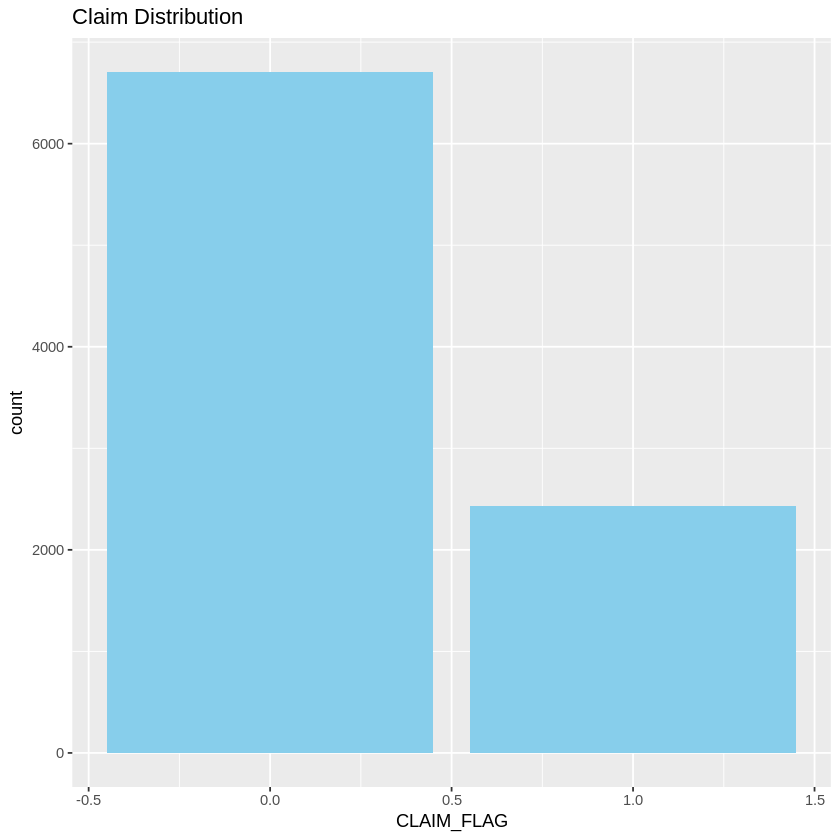

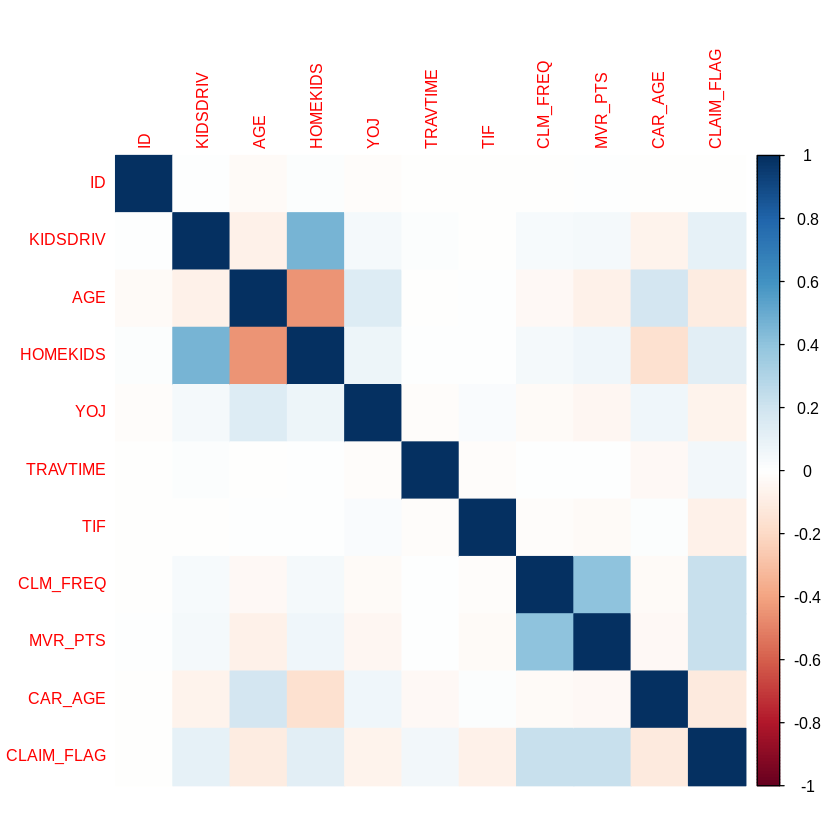

In [5]:
# Target variable distribution
ggplot(df, aes(x = CLAIM_FLAG)) +
  geom_bar(fill = "skyblue") +
  ggtitle("Claim Distribution")

# Correlation matrix for numeric variables only
numeric_df <- df %>% select(where(is.numeric))
corrplot(cor(numeric_df), method = "color", tl.cex = 0.8)


In [6]:
# Convert all character columns to factors
df <- df %>%
  mutate(across(where(is.character), as.factor))

# Optionally convert factors to numeric (for modeling)
df <- df %>%
  mutate(across(where(is.factor), as.numeric))


In [7]:
# Normalize features
features <- df %>% select(-CLAIM_FLAG)
scaled_features <- scale(features)
target <- df$CLAIM_FLAG


In [8]:
set.seed(123)
train_index <- createDataPartition(target, p = 0.8, list = FALSE)
X_train <- scaled_features[train_index, ]
X_test <- scaled_features[-train_index, ]
y_train <- target[train_index]
y_test <- target[-train_index]


In [9]:
model <- randomForest(x = X_train, y = as.factor(y_train), ntree = 100)


In [10]:
predictions <- predict(model, X_test)
confusionMatrix(predictions, as.factor(y_test))


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1340    1
         1    0  486
                                    
               Accuracy : 0.9995    
                 95% CI : (0.997, 1)
    No Information Rate : 0.7334    
    P-Value [Acc > NIR] : <2e-16    
                                    
                  Kappa : 0.9986    
                                    
 Mcnemar's Test P-Value : 1         
                                    
            Sensitivity : 1.0000    
            Specificity : 0.9979    
         Pos Pred Value : 0.9993    
         Neg Pred Value : 1.0000    
             Prevalence : 0.7334    
         Detection Rate : 0.7334    
   Detection Prevalence : 0.7340    
      Balanced Accuracy : 0.9990    
                                    
       'Positive' Class : 0         
                                    

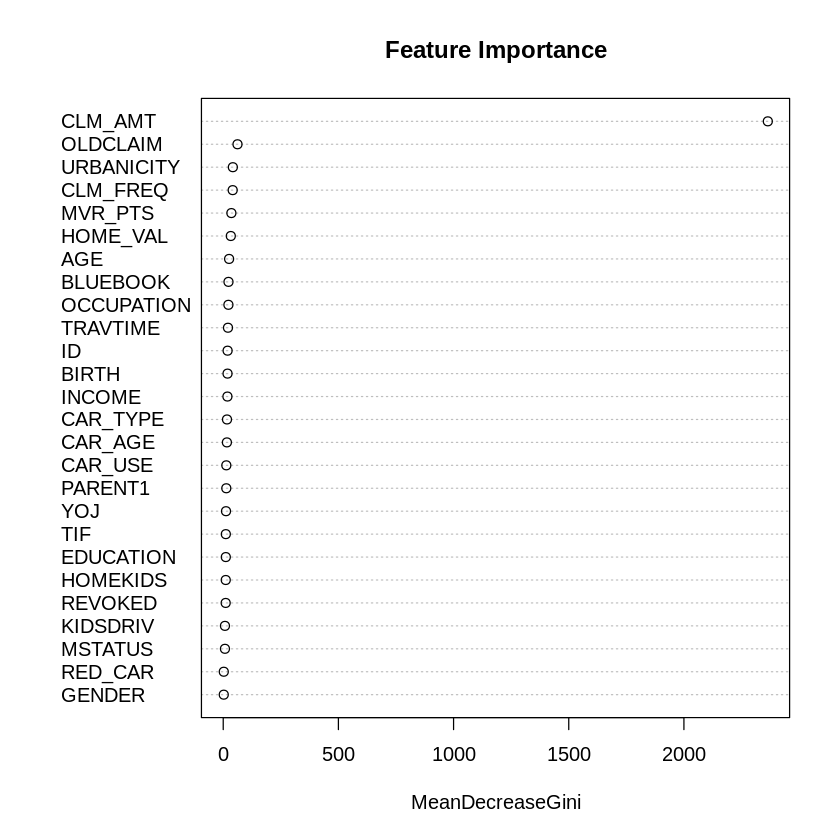

In [11]:
importance <- importance(model)
varImpPlot(model, main = "Feature Importance")
